In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt



In [3]:

class Data_fetcher:
    def __init__(self, ticker_symbol):
        self.ticker_symbol = ticker_symbol
        self.ticker = yf.Ticker(ticker_symbol)

    def get_info(self):
        return self.ticker.info
        
    def get_income_statement(self):
        return self.ticker.income_stmt

    def get_balance_sheet(self):
        return self.ticker.balance_sheet

    def get_cash_flow(self):
        return self.ticker.cashflow

    def get_share_price_data(self, period="max"):
        share_price_data = self.ticker.history(period=period)
        share_price_data.reset_index(inplace=True)
        return share_price_data
    
    # Calculate P/E Ratio row
    def calculate_pe_ratio(self, price, earnings_per_share):
        if earnings_per_share == 0 or earnings_per_share is None:
            return None
        return price / earnings_per_share

    def get_and_edit_income_statement(self):
        # Retrieve ticker data
        info = self.ticker.info
        income_statement = self.ticker.income_stmt

        # Share price data
        share_price_data = self.ticker.history(period="max")
        share_price_data.reset_index(inplace=True)

        # Add Share Price row
        share_prices = []
        for date_str in income_statement.columns:
            fiscal_date = pd.to_datetime(date_str).date()
            mask = share_price_data['Date'].dt.date <= fiscal_date
            if mask.any():
                last_row = share_price_data[mask].iloc[-1]
                share_prices.append(last_row['Close'])
            else:
                share_prices.append(None)
        income_statement.loc['Share Price'] = share_prices

        dividends = self.ticker.dividends.reset_index()
        dividends['Date'] = pd.to_datetime(dividends['Date']).dt.date

        dividend_values = []
        for date_str in income_statement.columns:
            fiscal_date = pd.to_datetime(date_str).date()
            mask = dividends['Date'] <= fiscal_date
            if mask.any():
                last_div = dividends[mask].iloc[-1]['Dividends']
                dividend_values.append(last_div)
            else:
                dividend_values.append(0.0)
        income_statement.loc['Dividends'] = dividend_values

        

        pe_ratios = []
        for col in income_statement.columns:
            share_price = income_statement.loc["Share Price", col]
            eps = income_statement.loc["Basic EPS", col] if "Basic EPS" in income_statement.index else None
            pe = self.calculate_pe_ratio(share_price, eps)
            pe_ratios.append(pe)
        income_statement.loc["P/E Ratio"] = pe_ratios

        print("\nFinal Income Statement with P/E Ratio:")
        print(income_statement)

        return info, income_statement
    

    def fnisd():
        pass



In [4]:
# Initialize for any stock
stock = Data_fetcher("AAPL")  # Replace AAPL with any ticker

# Get data for your EDA
info, income_statement = stock.get_and_edit_income_statement()
income_stmt = stock.get_income_statement()
balance_sheet = stock.get_balance_sheet()
cash_flow = stock.get_cash_flow()
share_prices = income_statement.loc["Share Price"]
dividends = income_statement.loc["Dividends"]


Final Income Statement with P/E Ratio:
                                                      2024-09-30  \
Tax Effect Of Unusual Items                         0.000000e+00   
Tax Rate For Calcs                                  2.410000e-01   
Normalized EBITDA                                   1.346610e+11   
Net Income From Continuing Operation Net Minori...  9.373600e+10   
Reconciled Depreciation                             1.144500e+10   
Reconciled Cost Of Revenue                          2.103520e+11   
EBITDA                                              1.346610e+11   
EBIT                                                1.232160e+11   
Net Interest Income                                          NaN   
Interest Expense                                             NaN   
Interest Income                                              NaN   
Normalized Income                                   9.373600e+10   
Net Income From Continuing And Discontinued Ope...  9.373600e+10   
Total Ex

In [5]:
info, income_statement = stock.get_and_edit_income_statement()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
income_statement



Final Income Statement with P/E Ratio:
                                                      2024-09-30  \
Tax Effect Of Unusual Items                         0.000000e+00   
Tax Rate For Calcs                                  2.410000e-01   
Normalized EBITDA                                   1.346610e+11   
Net Income From Continuing Operation Net Minori...  9.373600e+10   
Reconciled Depreciation                             1.144500e+10   
Reconciled Cost Of Revenue                          2.103520e+11   
EBITDA                                              1.346610e+11   
EBIT                                                1.232160e+11   
Net Interest Income                                          NaN   
Interest Expense                                             NaN   
Interest Income                                              NaN   
Normalized Income                                   9.373600e+10   
Net Income From Continuing And Discontinued Ope...  9.373600e+10   
Total Ex

,2024-09-30,2023-09-30,2022-09-30,2021-09-30
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Tax Rate For Calcs,2.410000e-01,1.470000e-01,1.620000e-01,1.330000e-01
Normalized EBITDA,1.346610e+11,1.258200e+11,1.305410e+11,1.231360e+11
Net Income From Continuing Operation Net Minority Interest,9.373600e+10,9.699500e+10,9.980300e+10,9.468000e+10
Reconciled Depreciation,1.144500e+10,1.151900e+10,1.110400e+10,1.128400e+10
Reconciled Cost Of Revenue,2.103520e+11,2.141370e+11,2.235460e+11,2.129810e+11
EBITDA,1.346610e+11,1.258200e+11,1.305410e+11,1.231360e+11
EBIT,1.232160e+11,1.143010e+11,1.194370e+11,1.118520e+11
Net Interest Income,NaN,-1.830000e+08,-1.060000e+08,1.980000e+08
Interest Expense,NaN,3.933000e+09,2.931000e+09,2.645000e+09


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df = income_statement.transpose()
correlations = df.corr()
share_price_corr = correlations["Share Price"].drop("Share Price").sort_values(ascending=False)
print("Correlations with Share Price (highest to lowest):")
print(share_price_corr)


Correlations with Share Price (highest to lowest):
Interest Income Non Operating                                 0.998787
Interest Income                                               0.998787
P/E Ratio                                                     0.992187
Interest Expense                                              0.961246
Interest Expense Non Operating                                0.961246
Dividends                                                     0.907528
Tax Rate For Calcs                                            0.903979
Tax Provision                                                 0.888935
Research And Development                                      0.807038
Operating Expense                                             0.778761
Gross Profit                                                  0.756945
Normalized EBITDA                                             0.706389
EBITDA                                                        0.706389
Pretax Income             

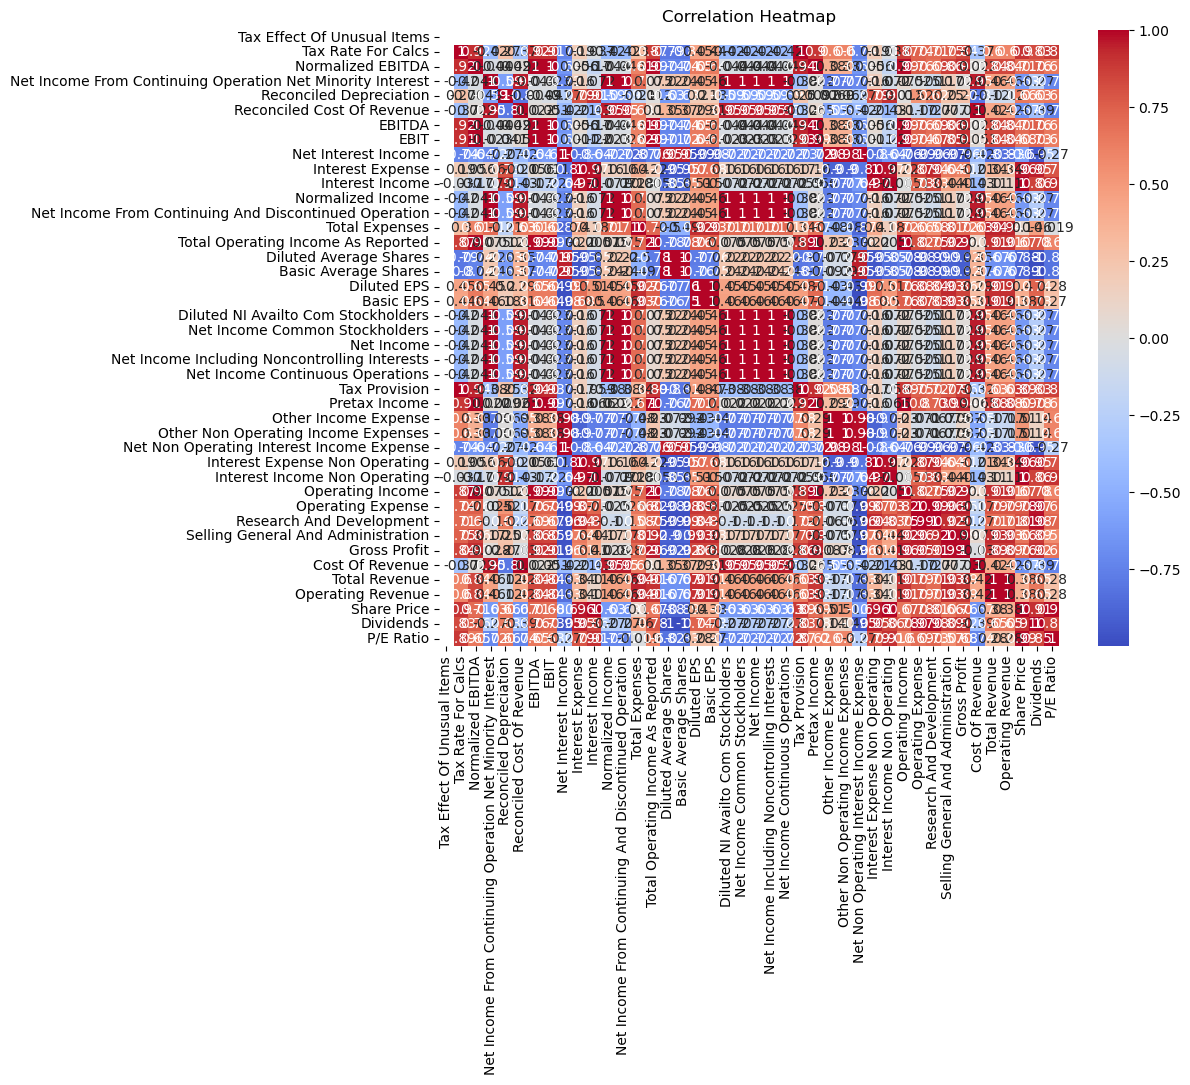

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
share_price_corr = correlations["Share Price"]

# Identify columns to keep (correlation > 0.3 or < -0.3)
cols_to_keep = share_price_corr[(share_price_corr > 0.3) | (share_price_corr < -0.3)].index

# Identify columns to remove (correlation between -0.3 and 0.3)
cols_to_remove = share_price_corr[(share_price_corr <= 0.3) & (share_price_corr >= -0.3)].index

# Drop columns outside the threshold
filtered_df = df[cols_to_keep]

print("Columns removed (correlation between -0.3 and 0.3):")
print(list(cols_to_remove))

filtered_df.head()

Columns removed (correlation between -0.3 and 0.3):
['Total Expenses']


,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,Interest Income,Normalized Income,Net Income From Continuing And Discontinued Operation,Total Operating Income As Reported,Diluted Average Shares,Basic Average Shares,Diluted EPS,Basic EPS,Diluted NI Availto Com Stockholders,Net Income Common Stockholders,Net Income,Net Income Including Noncontrolling Interests,Net Income Continuous Operations,Tax Provision,Pretax Income,Other Income Expense,Other Non Operating Income Expenses,Net Non Operating Interest Income Expense,Interest Expense Non Operating,Interest Income Non Operating,Operating Income,Operating Expense,Research And Development,Selling General And Administration,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue,Share Price,Dividends,P/E Ratio
2024-09-30,0.241,1.346610e+11,9.373600e+10,1.144500e+10,2.103520e+11,1.346610e+11,1.232160e+11,NaN,NaN,NaN,9.373600e+10,9.373600e+10,1.232160e+11,1.540810e+10,1.534378e+10,6.08,6.11,9.373600e+10,9.373600e+10,9.373600e+10,9.373600e+10,9.373600e+10,2.974900e+10,1.234850e+11,269000000.0,269000000.0,NaN,NaN,NaN,1.232160e+11,5.746700e+10,3.137000e+10,2.609700e+10,1.806830e+11,2.103520e+11,3.910350e+11,3.910350e+11,231.920624,0.25,37.957549
2023-09-30,0.147,1.258200e+11,9.699500e+10,1.151900e+10,2.141370e+11,1.258200e+11,1.143010e+11,-183000000.0,3.933000e+09,3.750000e+09,9.699500e+10,9.699500e+10,1.143010e+11,1.581255e+10,1.574423e+10,6.13,6.16,9.699500e+10,9.699500e+10,9.699500e+10,9.699500e+10,9.699500e+10,1.674100e+10,1.137360e+11,-565000000.0,-565000000.0,-183000000.0,3.933000e+09,3.750000e+09,1.143010e+11,5.484700e+10,2.991500e+10,2.493200e+10,1.691480e+11,2.141370e+11,3.832850e+11,3.832850e+11,169.549271,0.24,27.524232
2022-09-30,0.162,1.305410e+11,9.980300e+10,1.110400e+10,2.235460e+11,1.305410e+11,1.194370e+11,-106000000.0,2.931000e+09,2.825000e+09,9.980300e+10,9.980300e+10,1.194370e+11,1.632582e+10,1.621596e+10,6.11,6.15,9.980300e+10,9.980300e+10,9.980300e+10,9.980300e+10,9.980300e+10,1.930000e+10,1.191030e+11,-334000000.0,-334000000.0,-106000000.0,2.931000e+09,2.825000e+09,1.194370e+11,5.134500e+10,2.625100e+10,2.509400e+10,1.707820e+11,2.235460e+11,3.943280e+11,3.943280e+11,136.052353,0.23,22.122334
2021-09-30,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,2.645000e+09,2.843000e+09,9.468000e+10,9.468000e+10,1.089490e+11,1.686492e+10,1.670127e+10,5.61,5.67,9.468000e+10,9.468000e+10,9.468000e+10,9.468000e+10,9.468000e+10,1.452700e+10,1.092070e+11,60000000.0,60000000.0,198000000.0,2.645000e+09,2.843000e+09,1.089490e+11,4.388700e+10,2.191400e+10,2.197300e+10,1.528360e+11,2.129810e+11,3.658170e+11,3.658170e+11,138.524826,0.22,24.431186


In [9]:
import yfinance as yf
import pandas as pd
import requests
import time
from tqdm import tqdm
import sqlite3

class YFinanceCompanyDatabase:
    def __init__(self):
        self.companies_df = None
        
    def get_sp500_tickers(self):
        """Get S&P 500 companies using reliable sources"""
        try:
            # Method 1: Direct download from S&P Global
            print("Downloading S&P 500 list from S&P Global...")
            url = "https://raw.githubusercontent.com/datasets/s-and-p-500-companies/main/data/constituents.csv"
            sp500_df = pd.read_csv(url)
            tickers = sp500_df['Symbol'].tolist()
            print(f"✅ Successfully retrieved {len(tickers)} S&P 500 companies")
            return tickers
        except Exception as e:
            print(f"❌ S&P Global method failed: {e}")
        
        try:
            # Method 2: Wikipedia fallback
            print("Trying Wikipedia...")
            url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
            tables = pd.read_html(url)
            sp500_table = tables[0]
            tickers = sp500_table['Symbol'].tolist()
            print(f"✅ Wikipedia fallback: {len(tickers)} companies")
            return tickers
        except Exception as e:
            print(f"❌ Wikipedia failed: {e}")
        
        # Final fallback: Full S&P 500 list
        print("Using full S&P 500 fallback list")
        return self._get_full_sp500_fallback()
    
    def _get_full_sp500_fallback(self):
        """Full S&P 500 list as fallback"""
        full_sp500 = [
            'MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP',
            'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN',
            'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE',
            'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH',
            'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET',
            'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL',
            'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB',
            'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR',
            'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL',
            'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY',
            'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF',
            'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL',
            'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA',
            'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA',
            'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK',
            'DISH', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE',
            'DD', 'DXC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR',
            'ENPH', 'ETR', 'EOG', 'EPAM', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY',
            'RE', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS',
            'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FMC',
            'F', 'FTNT', 'FTV', 'FBHS', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT',
            'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GL', 'GS',
            'HAL', 'HBI', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT',
            'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII',
            'IEX', 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IBM',
            'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JKHY',
            'J', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KEY', 'KEYS',
            'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW',
            'LVS', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L',
            'LOW', 'LUMN', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM',
            'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET',
            'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'TAP', 'MDLZ',
            'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX',
            'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NSC', 'NTRS',
            'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL',
            'OMC', 'OKE', 'ORCL', 'OGN', 'OTIS', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC',
            'PYPL', 'PNR', 'PEP', 'PKI', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC',
            'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC',
            'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX',
            'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP',
            'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'NOW',
            'SHW', 'SPG', 'SWKS', 'SNA', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STE',
            'SYK', 'SIVB', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT',
            'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO',
            'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'TSN', 'UDR', 'ULTA', 'USB',
            'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'VLO', 'VTR',
            'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VTRS', 'V', 'VNO', 'VMC', 'WRB',
            'WAB', 'WMT', 'WBA', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC',
            'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WTW', 'GWW', 'WYNN', 'XEL', 'XYL',
            'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS'
        ]
        print(f"✅ Using full fallback: {len(full_sp500)} companies")
        return full_sp500
    
    def get_euro_stoxx_50_tickers(self):
        """Get EURO STOXX 50 companies"""
        euro_stoxx_50 = [
            'ASML.AS', 'SAN.PA', 'AIR.PA', 'OR.PA', 'MC.PA', 'SAF.PA', 'AI.PA', 'DG.PA', 
            'BNP.PA', 'ENEL.MI', 'ENI.MI', 'ISP.MI', 'ADS.DE', 'ALV.DE', 'BAS.DE', 
            'BAYN.DE', 'BMW.DE', 'CON.DE', 'DAI.DE', 'DBK.DE', 'DB1.DE', 'DPW.DE', 
            'DTE.DE', 'EOAN.DE', 'FME.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LIN.DE', 
            'MRK.DE', 'MUV2.DE', 'RWE.DE', 'SAP.DE', 'SIE.DE', 'VOW3.DE', 'ABI.BR', 
            'INGA.AS', 'PHIA.AS', 'UNA.AS', 'BBVA.MC', 'SAN.MC', 'IBE.MC', 'ITX.MC', 
            'REP.MC', 'NOVOb.CO', 'NESN.SW', 'ROG.SW', 'NOVN.SW', 'UBSG.SW'
        ]
        return euro_stoxx_50
    
    def get_global_tickers(self):
        """Combine S&P 500 and EURO STOXX 50"""
        sp500_tickers = self.get_sp500_tickers()
        euro_tickers = self.get_euro_stoxx_50_tickers()
        
        all_tickers = sp500_tickers + euro_tickers
        print(f"Found {len(sp500_tickers)} S&P 500 companies")
        print(f"Found {len(euro_tickers)} EURO STOXX 50 companies")
        print(f"Total unique tickers: {len(set(all_tickers))}")
        
        return list(set(all_tickers))
    
    def get_company_info(self, ticker, max_retries=3):
        """
        Get company information for a single ticker with error handling
        """
        for attempt in range(max_retries):
            try:
                stock = yf.Ticker(ticker)
                info = stock.info
                
                # Extract key information
                company_data = {
                    'ticker': ticker,
                    'name': info.get('longName', ''),
                    'sector': info.get('sector', ''),
                    'industry': info.get('industry', ''),
                    'country': info.get('country', ''),
                    'market_cap': info.get('marketCap', None),
                    'exchange': info.get('exchange', ''),
                    'currency': info.get('currency', ''),
                    'last_updated': pd.Timestamp.now()
                }
                return company_data
                
            except Exception as e:
                if attempt == max_retries - 1:
                    print(f"Failed to get data for {ticker}: {e}")
                    return None
                time.sleep(2)  # Wait before retry
    
    def build_company_database(self, use_popular_list=True, use_global_list=False, max_companies=100):
        """
        Build a database of company information
        """
        if use_global_list:
            tickers = self.get_global_tickers()
        elif use_popular_list:
            tickers = self.get_popular_tickers()
        else:
            tickers = self.get_all_tickers()
        
        # Limit to max_companies for testing
        tickers = tickers[:max_companies]
        
        print(f"Processing {len(tickers)} companies...")
        
        companies_data = []
        for ticker in tqdm(tickers):
            company_info = self.get_company_info(ticker)
            if company_info:
                companies_data.append(company_info)
            time.sleep(0.5)  # Rate limiting
        
        self.companies_df = pd.DataFrame(companies_data)
        print(f"Successfully retrieved data for {len(self.companies_df)} companies")
        return self.companies_df
    
    def save_to_csv(self, filename='yfinance_companies.csv'):
        """Save database to CSV"""
        if self.companies_df is not None:
            self.companies_df.to_csv(filename, index=False)
            print(f"Database saved to {filename}")
        else:
            print("No data to save. Run build_company_database() first.")
    
    def save_to_sqlite(self, db_name='yfinance_companies.db'):
        """Save database to SQLite"""
        if self.companies_df is not None:
            conn = sqlite3.connect(db_name)
            self.companies_df.to_sql('companies', conn, if_exists='replace', index=False)
            conn.close()
            print(f"Database saved to {db_name}")
        else:
            print("No data to save. Run build_company_database() first.")
    
    def get_database_stats(self):
        """Get statistics about the database"""
        if self.companies_df is not None:
            print("Database Statistics:")
            print(f"Total companies: {len(self.companies_df)}")
            print(f"Sectors: {self.companies_df['sector'].nunique()}")
            print(f"Industries: {self.companies_df['industry'].nunique()}")
            print(f"Countries: {self.companies_df['country'].nunique()}")
            print("\nSector distribution:")
            print(self.companies_df['sector'].value_counts())
        else:
            print("No database available. Run build_company_database() first.")

# Updated usage examples:
def quick_setup_global():
    """Quick setup for global companies (S&P 500 + EURO STOXX 50)"""
    db = YFinanceCompanyDatabase()
    
    # Build database with global companies - set max_companies high enough to get all
    companies_df = db.build_company_database(use_popular_list=False, use_global_list=True, max_companies=600)
    
    # Save to CSV for analysis
    db.save_to_csv('global_stock_companies.csv')
    
    # Show statistics
    db.get_database_stats()
    
    return db, companies_df

def quick_setup_popular():
    """Quick setup for popular companies only"""
    db = YFinanceCompanyDatabase()
    
    # Build database with popular companies (faster)
    companies_df = db.build_company_database(use_popular_list=True, use_global_list=False, max_companies=50)
    
    # Save to CSV for analysis
    db.save_to_csv('stock_companies.csv')
    
    # Show statistics
    db.get_database_stats()
    
    return db, companies_df

# Run this in your Jupyter notebook for GLOBAL companies:
db, companies_df = quick_setup_global()

# Or for POPULAR companies only:
# db, companies_df = quick_setup_popular()

✅ Successfully retrieved 503 S&P 500 companies
Found 503 S&P 500 companies
Found 49 EURO STOXX 50 companies
Total unique tickers: 552
Processing 552 companies...


100%|██████████| 552/552 [10:28<00:00,  1.14s/it]

Successfully retrieved data for 552 companies
Database saved to global_stock_companies.csv
Database Statistics:
Total companies: 552
Sectors: 12
Industries: 114
Countries: 14

Sector distribution:
sector
Technology                85
Financial Services        77
Industrials               75
Healthcare                68
Consumer Cyclical         62
Consumer Defensive        41
Utilities                 35
Real Estate               31
Communication Services    25
Energy                    24
Basic Materials           23
                           6
Name: count, dtype: int64


In [10]:
db.get_database_stats()

Database Statistics:
Total companies: 552
Sectors: 12
Industries: 114
Countries: 14

Sector distribution:
sector
Technology                85
Financial Services        77
Industrials               75
Healthcare                68
Consumer Cyclical         62
Consumer Defensive        41
Utilities                 35
Real Estate               31
Communication Services    25
Energy                    24
Basic Materials           23
                           6
Name: count, dtype: int64


In [11]:
def quick_setup_maximum():
    """Get maximum number of companies (all available)"""
    db = YFinanceCompanyDatabase()
    
    # Get all global companies without limiting
    companies_df = db.build_company_database(use_popular_list=False, use_global_list=True, max_companies=1000)
    
    # Save to CSV for analysis
    db.save_to_csv('maximum_stock_companies.csv')
    
    # Show statistics
    db.get_database_stats()
    
    return db, companies_df

# Use this if you want the absolute maximum:
# db, companies_df = quick_setup_maximum()

In [14]:
# If you already have the database object
db, companies_df = quick_setup_maximum()  # Fixed spelling: "maximum" not "maximmum"

# Check the number of companies
print(f"Total companies in database: {len(companies_df)}")

# Or use the built-in method
db.get_database_stats()

✅ Successfully retrieved 503 S&P 500 companies
Found 503 S&P 500 companies
Found 49 EURO STOXX 50 companies
Total unique tickers: 552
Processing 552 companies...


100%|██████████| 552/552 [11:03<00:00,  1.20s/it]

Successfully retrieved data for 552 companies
Database saved to maximum_stock_companies.csv
Database Statistics:
Total companies: 552
Sectors: 12
Industries: 114
Countries: 14

Sector distribution:
sector
Technology                85
Financial Services        77
Industrials               75
Healthcare                68
Consumer Cyclical         62
Consumer Defensive        41
Utilities                 35
Real Estate               31
Communication Services    25
Energy                    24
Basic Materials           23
                           6
Name: count, dtype: int64
Total companies in database: 552
Database Statistics:
Total companies: 552
Sectors: 12
Industries: 114
Countries: 14

Sector distribution:
sector
Technology                85
Financial Services        77
Industrials               75
Healthcare                68
Consumer Cyclical         62
Consumer Defensive        41
Utilities                 35
Real Estate               31
Communication Services    25
Energy        

In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

class MultiCompanyAnalyzer:
    def __init__(self, company_tickers):
        self.company_tickers = company_tickers
        self.all_correlations = {}
        self.results_summary = []
        
    def analyze_companies(self, max_companies=30):
        """Analyze correlations for multiple companies"""
        successful_analyses = 0
        
        for ticker in tqdm(self.company_tickers[:max_companies]):
            try:
                print(f"\n{'='*50}")
                print(f"Analyzing {ticker}...")
                print(f"{'='*50}")
                
                # Initialize data fetcher
                stock = Data_fetcher(ticker)
                
                # Get enhanced income statement
                info, income_statement = stock.get_and_edit_income_statement()
                
                # Check if we have sufficient data
                if income_statement is None or income_statement.empty:
                    print(f"No income statement data for {ticker}")
                    continue
                    
                if "Share Price" not in income_statement.index:
                    print(f"No share price data for {ticker}")
                    continue
                
                # Calculate correlations
                df = income_statement.transpose()
                
                # Handle non-numeric columns and infinite values
                numeric_df = df.apply(pd.to_numeric, errors='coerce')
                numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan)
                
                # Drop columns with all NaN values
                numeric_df = numeric_df.dropna(axis=1, how='all')
                
                if "Share Price" not in numeric_df.columns:
                    print(f"No share price in numeric data for {ticker}")
                    continue
                
                correlations = numeric_df.corr()
                
                if "Share Price" in correlations.columns:
                    share_price_corr = correlations["Share Price"].drop("Share Price", errors='ignore')
                    share_price_corr = share_price_corr.sort_values(ascending=False)
                    
                    # Store results
                    self.all_correlations[ticker] = share_price_corr
                    
                    # Print top correlations
                    print(f"\nTop 10 correlations with Share Price for {ticker}:")
                    print(share_price_corr.head(10))
                    
                    print(f"\nBottom 10 correlations with Share Price for {ticker}:")
                    print(share_price_corr.tail(10))
                    
                    # Store summary statistics
                    self._store_summary(ticker, share_price_corr, info)
                    successful_analyses += 1
                    
                else:
                    print(f"No share price correlation calculated for {ticker}")
                    
                # Small delay to avoid rate limiting
                import time
                time.sleep(1)
                
            except Exception as e:
                print(f"Error analyzing {ticker}: {e}")
                continue
        
        print(f"\n{'='*60}")
        print(f"Analysis complete! Successfully analyzed {successful_analyses} companies")
        print(f"{'='*60}")
        
        return self.all_correlations
    
    def _store_summary(self, ticker, correlations, info):
        """Store summary statistics for each company"""
        summary = {
            'ticker': ticker,
            'company_name': info.get('longName', ticker),
            'sector': info.get('sector', 'Unknown'),
            'industry': info.get('industry', 'Unknown'),
            'total_variables': len(correlations),
            'positive_correlations': len(correlations[correlations > 0]),
            'negative_correlations': len(correlations[correlations < 0]),
            'strong_positive_count': len(correlations[correlations > 0.7]),
            'strong_negative_count': len(correlations[correlations < -0.7]),
            'avg_correlation': correlations.mean(),
            'max_correlation': correlations.max(),
            'min_correlation': correlations.min(),
            'top_5_variables': correlations.head(5).index.tolist(),
            'bottom_5_variables': correlations.tail(5).index.tolist()
        }
        self.results_summary.append(summary)
    
    def get_overall_patterns(self):
        """Analyze overall patterns across all companies"""
        if not self.results_summary:
            print("No results available. Run analyze_companies() first.")
            return
        
        summary_df = pd.DataFrame(self.results_summary)
        
        print("\nOVERALL PATTERNS ACROSS ALL COMPANIES:")
        print("="*50)
        
        # Most common top variables
        all_top_vars = []
        for result in self.results_summary:
            all_top_vars.extend(result['top_5_variables'])
        
        top_var_counts = pd.Series(all_top_vars).value_counts()
        print("\nMost frequently appearing in TOP 5 correlated variables:")
        print(top_var_counts.head(10))
        
        # Most common bottom variables
        all_bottom_vars = []
        for result in self.results_summary:
            all_bottom_vars.extend(result['bottom_5_variables'])
        
        bottom_var_counts = pd.Series(all_bottom_vars).value_counts()
        print("\nMost frequently appearing in BOTTOM 5 correlated variables:")
        print(bottom_var_counts.head(10))
        
        # Sector analysis
        if 'sector' in summary_df.columns:
            print("\nAverage correlation strength by sector:")
            sector_avg = summary_df.groupby('sector')['avg_correlation'].mean().sort_values(ascending=False)
            print(sector_avg)
        
        return summary_df
    
    def plot_sector_analysis(self):
        """Create visualizations of the results"""
        if not self.results_summary:
            print("No results available. Run analyze_companies() first.")
            return
        
        summary_df = pd.DataFrame(self.results_summary)
        
        # Create subplots
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Plot 1: Average correlation by sector
        if 'sector' in summary_df.columns:
            sector_avg = summary_df.groupby('sector')['avg_correlation'].mean().sort_values()
            sector_avg.plot(kind='barh', ax=axes[0,0], color='skyblue')
            axes[0,0].set_title('Average Correlation Strength by Sector')
            axes[0,0].set_xlabel('Average Correlation')
        
        # Plot 2: Distribution of maximum correlations
        summary_df['max_correlation'].hist(ax=axes[0,1], bins=20, color='lightgreen')
        axes[0,1].set_title('Distribution of Maximum Correlations')
        axes[0,1].set_xlabel('Maximum Correlation')
        axes[0,1].set_ylabel('Frequency')
        
        # Plot 3: Positive vs Negative correlations count
        pos_neg_data = summary_df[['positive_correlations', 'negative_correlations']].mean()
        pos_neg_data.plot(kind='bar', ax=axes[1,0], color=['green', 'red'])
        axes[1,0].set_title('Average Count of Positive vs Negative Correlations')
        axes[1,0].set_ylabel('Average Count')
        
        # Plot 4: Strong correlations count
        strong_data = summary_df[['strong_positive_count', 'strong_negative_count']].mean()
        strong_data.plot(kind='bar', ax=axes[1,1], color=['darkgreen', 'darkred'])
        axes[1,1].set_title('Average Count of Strong Correlations (|r| > 0.7)')
        axes[1,1].set_ylabel('Average Count')
        
        plt.tight_layout()
        plt.show()
    
    def get_most_consistent_variables(self, min_companies=5):
        """Find variables that consistently appear in top/bottom correlations"""
        if not self.all_correlations:
            print("No correlation data available. Run analyze_companies() first.")
            return
        
        # Count variable appearances in top 10 and bottom 10
        top_appearances = {}
        bottom_appearances = {}
        
        for ticker, correlations in self.all_correlations.items():
            top_vars = correlations.head(10).index
            bottom_vars = correlations.tail(10).index
            
            for var in top_vars:
                top_appearances[var] = top_appearances.get(var, 0) + 1
            
            for var in bottom_vars:
                bottom_appearances[var] = bottom_appearances.get(var, 0) + 1
        
        # Filter for variables that appear in multiple companies
        consistent_top = {k: v for k, v in top_appearances.items() if v >= min_companies}
        consistent_bottom = {k: v for k, v in bottom_appearances.items() if v >= min_companies}
        
        print(f"\nVARIABLES CONSISTENTLY CORRELATED (appearing in ≥{min_companies} companies):")
        print("="*60)
        print("\nConsistently POSITIVE correlations:")
        for var, count in sorted(consistent_top.items(), key=lambda x: x[1], reverse=True):
            print(f"  {var}: {count} companies")
        
        print("\nConsistently NEGATIVE correlations:")
        for var, count in sorted(consistent_bottom.items(), key=lambda x: x[1], reverse=True):
            print(f"  {var}: {count} companies")
        
        return consistent_top, consistent_bottom

# Usage example:
def run_analysis():
    # Your list of company tickers (from your database)
    company_tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'JPM', 
                      'JNJ', 'V', 'PG', 'UNH', 'HD', 'DIS', 'PYPL', 'NFLX', 'ADBE', 
                      'CRM', 'INTC', 'CSCO', 'PEP', 'T', 'VZ', 'ABT', 'TMO', 'COST', 
                      'LLY', 'WMT', 'XOM', 'CVX']
    
    # Initialize analyzer
    analyzer = MultiCompanyAnalyzer(company_tickers)
    
    # Run analysis
    all_correlations = analyzer.analyze_companies(max_companies=30)
    
    # Get overall patterns
    summary_df = analyzer.get_overall_patterns()
    
    # Plot results
    analyzer.plot_sector_analysis()
    
    # Find most consistent variables
    consistent_top, consistent_bottom = analyzer.get_most_consistent_variables(min_companies=3)
    
    return analyzer, all_correlations, summary_df

# Run the analysis
analyzer, all_correlations, summary_df = run_analysis()

100%|██████████| 30/30 [00:00<?, ?it/s]



Analyzing AAPL...
Error analyzing AAPL: name 'Data_fetcher' is not defined

Analyzing MSFT...
Error analyzing MSFT: name 'Data_fetcher' is not defined

Analyzing GOOGL...
Error analyzing GOOGL: name 'Data_fetcher' is not defined

Analyzing AMZN...
Error analyzing AMZN: name 'Data_fetcher' is not defined

Analyzing TSLA...
Error analyzing TSLA: name 'Data_fetcher' is not defined

Analyzing META...
Error analyzing META: name 'Data_fetcher' is not defined

Analyzing NVDA...
Error analyzing NVDA: name 'Data_fetcher' is not defined

Analyzing JPM...
Error analyzing JPM: name 'Data_fetcher' is not defined

Analyzing JNJ...
Error analyzing JNJ: name 'Data_fetcher' is not defined

Analyzing V...
Error analyzing V: name 'Data_fetcher' is not defined

Analyzing PG...
Error analyzing PG: name 'Data_fetcher' is not defined

Analyzing UNH...
Error analyzing UNH: name 'Data_fetcher' is not defined

Analyzing HD...
Error analyzing HD: name 'Data_fetcher' is not defined

Analyzing DIS...
Error analyz

TypeError: cannot unpack non-iterable NoneType object